# Primer acercamiento a machine learning
* Carlo Crivelli Hernández A01656171

Importamos todas la librerias y lo necesario para el codigo.

In [67]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve , roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


Leemos nuestra base de datos y hacemos una normalizacion a los datos

In [2]:
df = pd.read_csv('base_de_datos_examen.csv')

df.head(10)

for idx, dr in enumerate(df.columns):
    if 'dr' in dr:
        minimun = df[f'dr{idx}'].min()
        maximun = df[f'dr{idx}'].max()
        df[f'dr{idx}'] = (df[f'dr{idx}'] - minimun) / (maximun - minimun)

df

,Unnamed: 0,dr1,dr2,dr3,dr4,dr5,dr6,dr7,dr8,dr9,dr10,labels
0,717255,0.285413,0.335103,0.361788,0.373822,0.416241,0.436165,0.478518,0.518293,0.524922,0.530168,0
1,689912,0.316322,0.321062,0.321113,0.331842,0.358651,0.382861,0.442644,0.490987,0.542695,0.586885,0
2,490033,0.244998,0.311156,0.332849,0.342746,0.398901,0.418164,0.490346,0.570613,0.581188,0.526441,1
3,938891,0.157586,0.161258,0.155227,0.158502,0.175425,0.199948,0.268992,0.294304,0.290241,0.292116,0
4,695887,0.367262,0.408409,0.413047,0.418006,0.450630,0.461600,0.517309,0.564576,0.592009,0.565940,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,256407,0.293035,0.416531,0.486126,0.522102,0.609205,0.631120,0.695484,0.776406,0.805755,0.795539,1
9996,705457,0.290214,0.329744,0.340626,0.352134,0.405632,0.421981,0.445583,0.455130,0.494762,0.529686,1
9997,682593,0.199812,0.214900,0.213899,0.214355,0.193348,0.177953,0.192720,0.210038,0.245062,0.267989,0
9998,105235,0.334141,0.405109,0.436083,0.456470,0.502289,0.551564,0.618432,0.656316,0.685461,0.706715,0


Realizamos la distribucion de probabilidad de las etiquetas

c:\Users\carlo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\carlo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


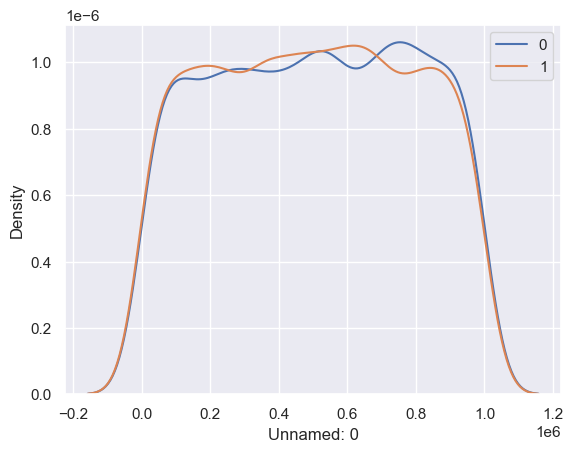

c:\Users\carlo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\carlo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


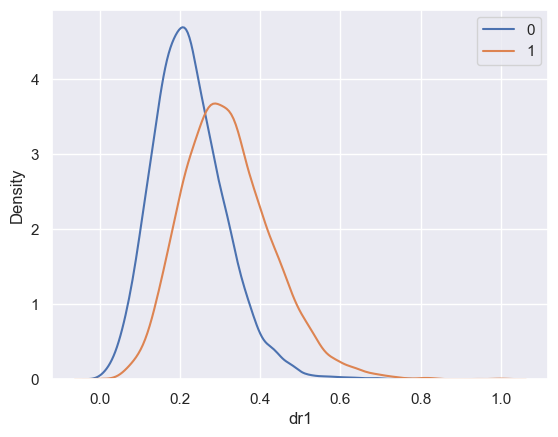

c:\Users\carlo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\carlo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


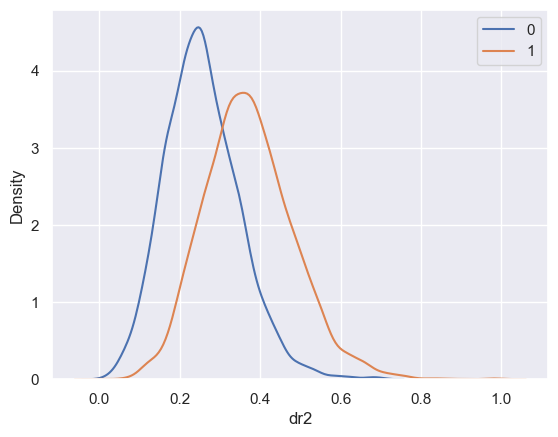

c:\Users\carlo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\carlo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


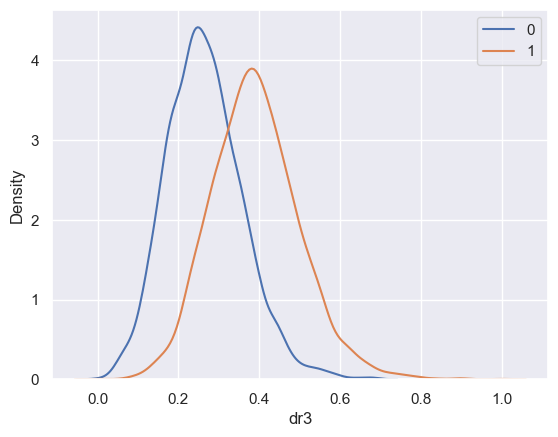

c:\Users\carlo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\carlo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


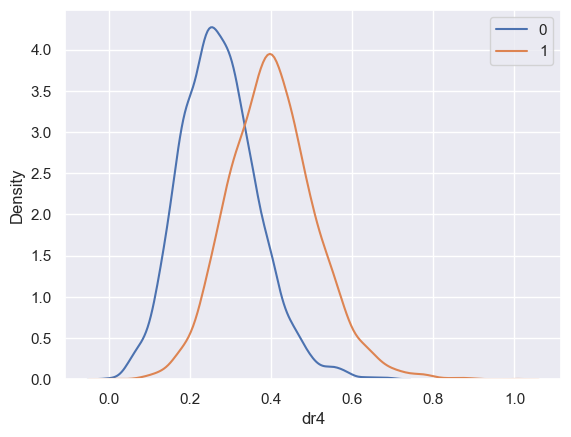

c:\Users\carlo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\carlo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


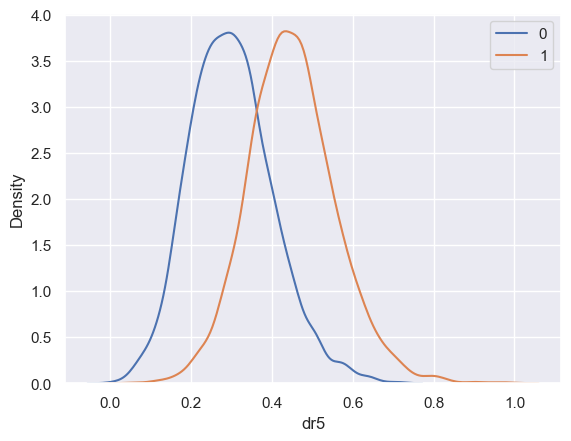

c:\Users\carlo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\carlo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


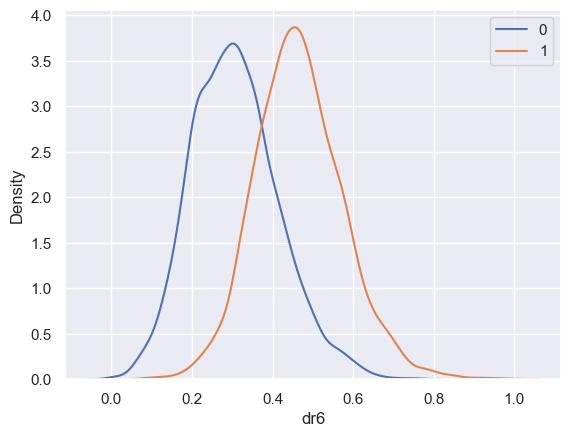

c:\Users\carlo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\carlo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


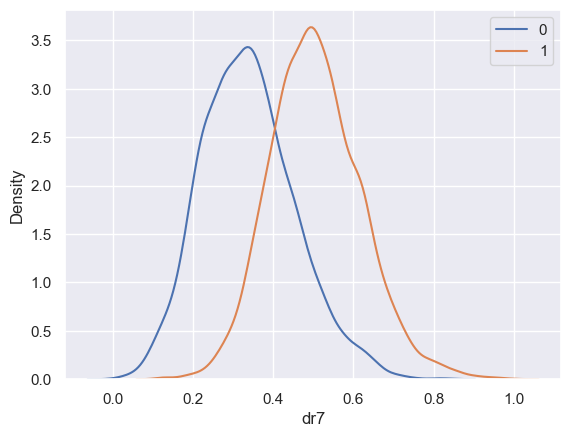

c:\Users\carlo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\carlo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


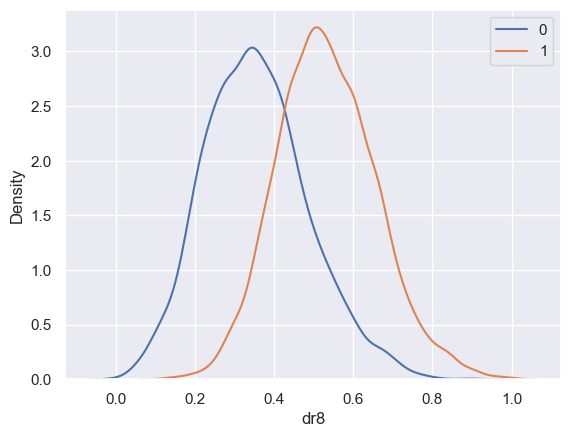

c:\Users\carlo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\carlo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


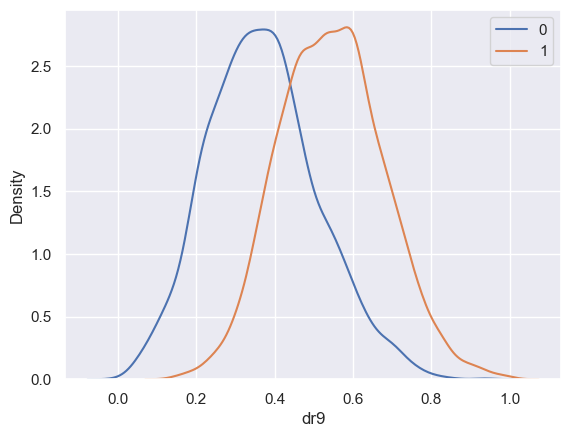

c:\Users\carlo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\carlo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


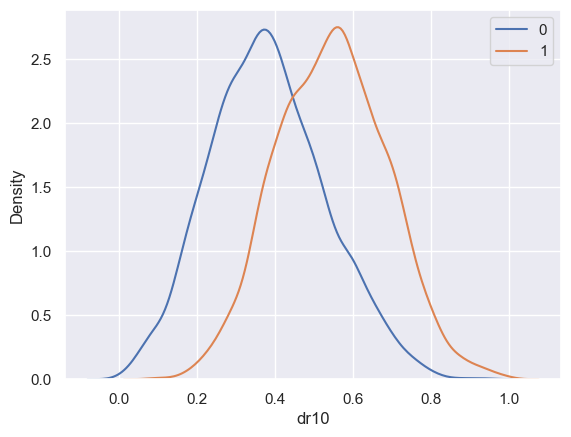

In [3]:
df_0=df[df.labels==0]
df_1=df[df.labels==1]
columns_to_plot=['Unnamed: 0','dr1','dr2','dr3','dr4','dr5','dr6','dr7','dr8','dr9','dr10']
sns.set(style='darkgrid')
for column in columns_to_plot:
    sns.distplot(df_0[column],kde=True,hist=False,label='0')
    sns.distplot(df_1[column],kde=True,hist=False,label='1')
    plt.legend()
    plt.show()

# Arbol de decision

Sacamos la exactitud

In [47]:
features = df.columns
features = features.drop(['labels'])

x = df[features]
y = df.labels

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.01, random_state=42)

dt = tree.DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6, 
                            max_features=8, max_leaf_nodes=None, min_samples_leaf=2, 
                            min_samples_split=2, min_weight_fraction_leaf=0.0, random_state=1,
                            splitter='best')

dt = dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print("Accuracy:", metrics.accuracy_score (y_test, y_pred))

Accuracy: 0.82


Sacamos los mejores parametros para nuestro arbol de decision

In [68]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV (dt, param_grid=param_grid, cv=5)
grid_search.fit(x, y)  


print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

Mejores hiperparámetros encontrados:
{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2}


Sacamos nuestra matriz de confusion

Text(0.5, 1, 'Confusion matrix')

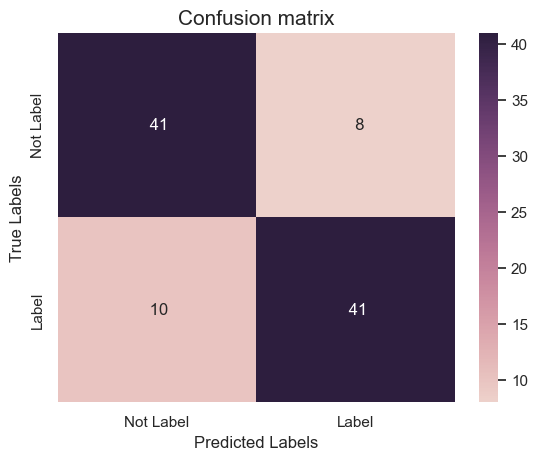

In [29]:
class_names = ['Not Label','Label']

sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='3.0f', xticklabels=('Not Label','Label'), 
            yticklabels=('Not Label','Label'), cmap=sns.cubehelix_palette(as_cmap=True))

plt.xlabel('Predicted Labels') 
plt.ylabel('True Labels')
plt.title('Confusion matrix', y=1, size=15)

Sacamos la curva ROC

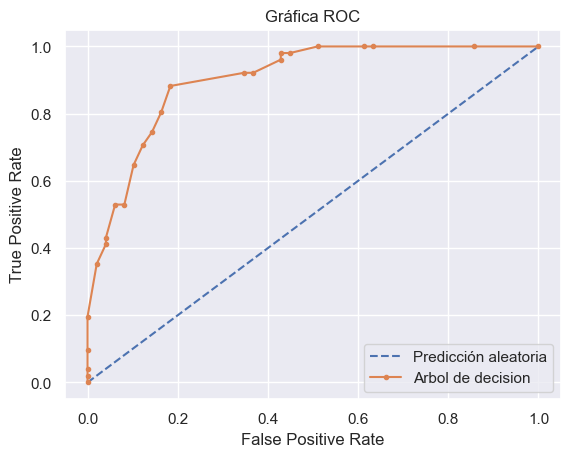

In [57]:
r_probs = [0 for _ in range(len(y_test))] 
t_probs = dt.predict_proba(x_test) 
t_probs = t_probs[:, 1]

r_auc = roc_auc_score(y_test , r_probs)
t_auc = roc_auc_score(y_test , t_probs)

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
t_fpr , t_tpr , _ = roc_curve(y_test,t_probs)

plt.plot(r_fpr , r_tpr, linestyle = '--', label= 'Predicción aleatoria'% r_auc)
plt.plot(t_fpr , t_tpr, marker='.', label= 'Arbol de decision'% t_auc)

plt.title('Gráfica ROC')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.legend() 
plt.show()

Sacamos su curva de aprendizaje

In [51]:
start_time = time.time()
train_sizes, train_scores, test_scores = learning_curve(dt,x,y,cv=40,scoring='accuracy',n_jobs=-1,
train_sizes=np.linspace(0.01, 1.0, 50))
print('   elapsed time = %s seconds    ' % (time.time()- start_time))

   elapsed time = 19.388662576675415 seconds    


In [54]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

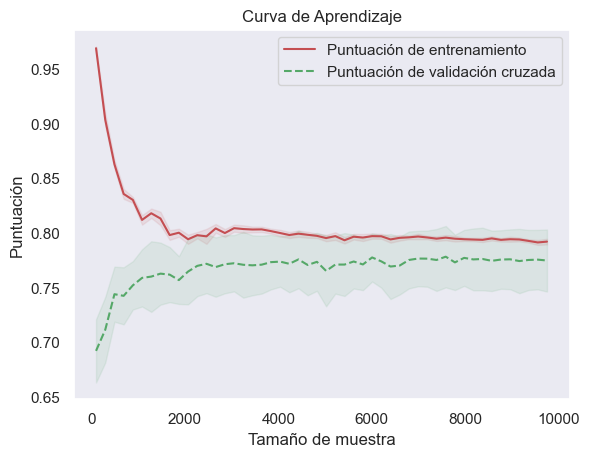

In [55]:
plt.figure()
plt.title("Curva de Aprendizaje")
plt.xlabel("Tamaño de muestra")
plt.ylabel("Puntuación")
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, color="r", linestyle='solid',label="Puntuación de entrenamiento")
plt.plot(train_sizes, test_scores_mean, color="g", linestyle='dashed',label="Puntuación de validación cruzada")
plt.legend(loc="best")
plt.show()

# Bayes ingenuo

In [74]:
x = df[["Unnamed: 0","dr1","dr2","dr3","dr4","dr5","dr6","dr7","dr8","dr9","dr10"]]
y = df['labels']

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.01, random_state=42)
gnb=GaussianNB()
gnb.fit(xTrain,yTrain)

y_pred=gnb.predict(xTest)


Text(0.5, 1, 'Confusion matrix')

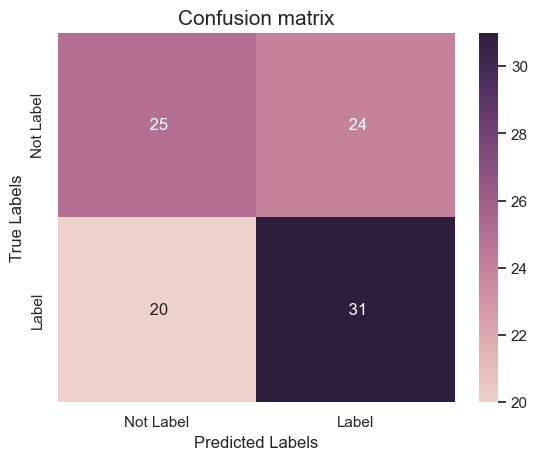

In [75]:
class_names = ['Not Label','Label']

sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='3.0f', xticklabels=('Not Label','Label'), 
            yticklabels=('Not Label','Label'), cmap=sns.cubehelix_palette(as_cmap=True))

plt.xlabel('Predicted Labels') 
plt.ylabel('True Labels')
plt.title('Confusion matrix', y=1, size=15)

Sacamos La grafica ROC

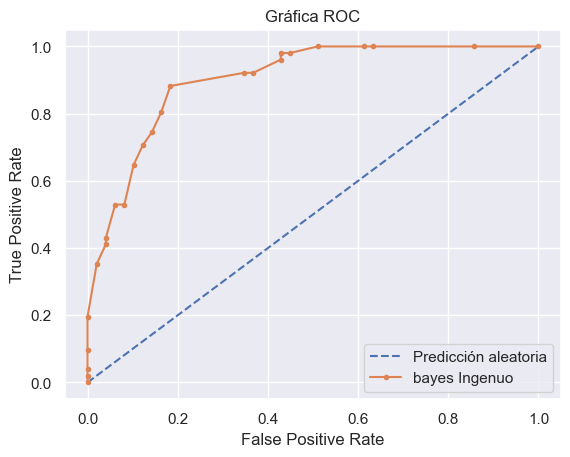

In [78]:
r_probs = [0 for _ in range(len(y_test))] 
t_probs = dt.predict_proba(x_test) 
t_probs = t_probs[:, 1]

r_auc = roc_auc_score(y_test , r_probs)
t_auc = roc_auc_score(y_test , t_probs)

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
t_fpr , t_tpr , _ = roc_curve(y_test,t_probs)

plt.plot(r_fpr , r_tpr, linestyle = '--', label= 'Predicción aleatoria'% r_auc)
plt.plot(t_fpr , t_tpr, marker='.', label= 'bayes Ingenuo'% t_auc)

plt.title('Gráfica ROC')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.legend() 

Sacamos su curva de aprendizaje

In [79]:
start_time = time.time()
train_sizes, train_scores, test_scores = learning_curve(dt,x,y,cv=40,scoring='accuracy',n_jobs=-1,
train_sizes=np.linspace(0.01, 1.0, 50))
print('   elapsed time = %s seconds    ' % (time.time()- start_time))

   elapsed time = 18.310556173324585 seconds    


In [80]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

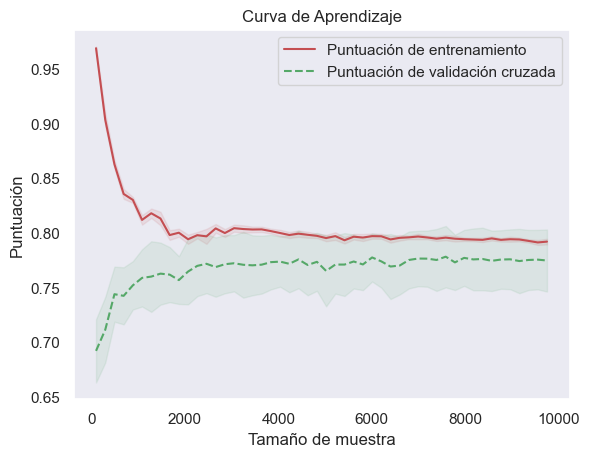

In [81]:
plt.figure()
plt.title("Curva de Aprendizaje")
plt.xlabel("Tamaño de muestra")
plt.ylabel("Puntuación")
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, color="r", linestyle='solid',label="Puntuación de entrenamiento")
plt.plot(train_sizes, test_scores_mean, color="g", linestyle='dashed',label="Puntuación de validación cruzada")
plt.legend(loc="best")
plt.show()